In [12]:
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline,Pipeline
import matplotlib.pyplot as plt 

from data_prepare_func import convert_to_array

from grid_search_utils import plot_grid_search,table_grid_search

In [2]:
x_kit,y_kit = convert_to_array("data_fr_kittinan/",size=28)
x_diy,y_diy = convert_to_array('data_writing_diy/',size=28)

In [3]:
x = np.append(x_kit,x_diy,axis=0)

y = np.append(y_kit,y_diy,axis=0)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [6]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=42)) # object='multi:softmax',num_class=4,seed=42,eval_metric='merror'
])

In [7]:
parameters = [{'classifier__hidden_layer_sizes' : [ (50,50,), (100,),(150,)]
               ,'classifier__activation':['relu', 'tanh','identity','logistic']
               ,'classifier__solver':['lbfgs','adam','sgd']
               ,'classifier__alpha':[0.0001,0.05,0.1]},
]

In [8]:
grid = GridSearchCV(pipe,parameters,cv=5,n_jobs=-1,scoring='accuracy')
grid.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
# 37m

Best parameter (CV score=0.806):
{'classifier__activation': 'relu', 'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__solver': 'adam'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=(50, 50),
                               random_state=42))])


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
pipe.set_params(classifier__activation='relu', classifier__alpha = 0.1, classifier__hidden_layer_sizes = (50, 50), classifier__solver = 'adam')

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=(50, 50),
                               random_state=42))])

In [11]:
train_sizes, train_scores, test_scores = learning_curve(pipe, x_train, y_train, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

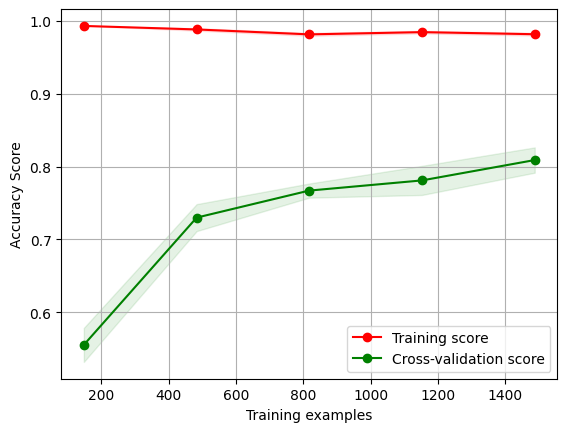

In [13]:
plt.figure()
plt.xlabel("Training examples")
plt.ylabel("Accuracy Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

plt.legend(loc="best")

In [14]:
# Redefine the pipeline using result from gridsearch

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(alpha=0.1, hidden_layer_sizes=(50, 50),
                               random_state=42))])

pipe.fit(x_train, y_train,)

print('Training nn set score: ' + str(pipe.score(x_train,y_train)))
print('Test nn set score: ' + str(pipe.score(x_test,y_test)))

Training nn set score: 0.9811726734803657
Test nn set score: 0.8007518796992481


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
pipe.fit(x_train, y_train)

train_yhat = pipe.predict(x_train)
train_pipe = pipe.score(x_train,y_train)

test_yhat = pipe.predict(x_test)
test_pipe = pipe.score(x_test,y_test)
print('Train Score\n',classification_report(y_train,train_yhat))
print('Test Score\n',classification_report(y_test, test_yhat))
print(f"AVG Accuracy Train: {train_pipe}\nAVG Accuracy Test: {test_pipe}")


Train Score
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       1.00      0.99      1.00       185
           2       1.00      0.99      1.00       187
           3       1.00      0.98      0.99       188
           4       1.00      0.96      0.98       185
           5       0.99      0.95      0.97       185
           6       0.85      1.00      0.92       185
           7       1.00      0.99      1.00       185
           8       0.99      0.97      0.98       184
           9       1.00      0.98      0.99       190

    accuracy                           0.98      1859
   macro avg       0.98      0.98      0.98      1859
weighted avg       0.98      0.98      0.98      1859

Test Score
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        79
           1       0.96      0.96      0.96        80
           2       0.92      0.88      0.90        80

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
nn_val_score = cross_val_score(pipe,x_train,y_train,scoring='accuracy',cv=10)
print(f"Average nn cv score: {round(np.mean(nn_val_score),4)}\nnn SD: {nn_val_score.std()}")

c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Average nn cv score: 0.8144
nn SD: 0.01706270719009745


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
plot_grid_search(grid)

In [ ]:
table_grid_search(grid)